## Базовые методы анализа данных и машинного обучения, 17.02-18.02

## Итоговое задание

## Нужно выполнить задания в этом ноутбуке (написать код) и прислать этот ноутбук обратно. Он будет проверен преподавателем и будет выставлена оценка.

### При отправке выполненного ноутбука укажите в названии ноутбука ваше имя и фамилию

В этом домашнем задании вам предлагается проанализировать данные о стоимости на жилую недвижимость в Бостоне в зависимости от различных параметров объекта жилой недвижимости (число комнат, насколько район криминален, какую долю населения района составляют люди из бедного класса)

**Всего можно набрать 100 баллов**

Разбалловка в задании:

**50 баллов** можно набрать за исследование данных - анализ данных в Pandas и построение графиков в Matplotlib, Seaborn

**50 баллов** можно набрать за машинное обучение - подготовка данных к обучению (разделение на Train и Test), обучение модели, оценка качества, анализ модели.

**Вы можете обращаться в чат курса по любым вопросам по этому домашнему заданию**

Начиная с "у меня возникла ошибка в коде, и я не знаю, как ее починить", "как добавить новую ячейку в Jupyter ноутбуке" и заканчивая вопросами по применению алгоритмов машинного обучения.

**Примечание 1: используйте гугл и материалы курса!**

Вы, несомненно, владеете английским языком, поэтому можете с легкостью погуглить вашу проблему/ошибку на английском языке. В случае, если использование гугла вам не помогло - смело пишите в чат курса (или преподавателю на почту, если вас нет в Телеграме) -  помощь обязательно придет!

**Примечание 2: в анализе данных нет ничего непоправимого**

Если где-то в коде у вас возникла ошибка, и вам кажется, что вы сделали с данными что-то необратимое - не паникуйте. Просто перезапустите весь ноутбук, прогнав все ячейки с самого начала.

In [1]:
# импортируем нужные модули
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

Загрузка данных и знакомство с ними

In [0]:
from google.colab import files
files.upload()

Saving boston_housing_price.csv to boston_housing_price.csv


{'boston_housing_price.csv': b'CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,RENT_PRICE\n0.00632,2.31,0.5379999999999999,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0\n0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6\n0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7\n0.032369999999999996,2.18,0.45799999999999996,6.9979999999999976,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4\n0.06905,2.18,0.45799999999999996,7.147,54.2,6.0622,3.0,222.0,18.7,396.9,5.33,36.2\n0.02985,2.18,0.45799999999999996,6.43,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7\n0.08829,7.87,0.524,6.0120000000000005,66.6,5.5605,5.0,311.0,15.2,395.6,12.43,22.9\n0.14455,7.87,0.524,6.1720000000000015,96.1,5.9505,5.0,311.0,15.2,396.9,19.15,27.1\n0.21124,7.87,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5\n0.17004,7.87,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.1,18.9\n0.22489,7.87,0.524,6.3770000000000024,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0\n0.11747,7.87,0.524,6

In [2]:
import csv
import pandas as pd

In [13]:
# считываем данные
df = pd.read_csv("boston_housing_price.csv")

In [4]:
df.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,RENT_PRICE
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# список колонок
list(df.columns)

['CRIM',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'RENT_PRICE']

## Описание признаков:
- **CRIM** - per capita crime rate by town - уровень преступности на душу населения в районе объекта недвижимости
- **INDUS** - proportion of non-retail business acres per town - доля акров не розничного бизнеса в районе
- **NOX** - nitric oxides concentration (parts per 10 million) -  концентрация оксидов азота NOX (частей на 10 млн.)
- **RM** - average number of rooms per dwelling - среднее количество комнат в одном жилом помещении
- **AGE** - proportion of owner-occupied units built prior to 1940 - доля зданий в районе, построенных до 1940 года
- **DIS** - weighted distances to five Boston employment centres - взвешенные расстояния до пяти бостонских центров занятости
- **RAD** - index of accessibility to radial highways - индекс доступности к радиальным магистралям
- **TAX** - full-value property-tax rate per $ \$10,000$ - ставка налога на недвижимость за каждые $\$10,000$ стоимости недвижимости
- **PTRATIO** - число учеников в школах на одного школьного учителя
- **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town - число, показывающее число 
- **LSTAT** - % lower status of the population - какую долю населения района составляют люди из бедного класса

**RENT_PRICE** - стоимость аренды объекта жилья в месяц. Это целевое значение, которое хотим научиться хорошо предсказывать.

In [6]:
# функиця describe() в Pandas вычисляет разные характеристики данных
# для каждой колонки оно вычисляет: среднее, стандартное отклонение,
# минимум, максимум, и квантили различного уровня
df.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,RENT_PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


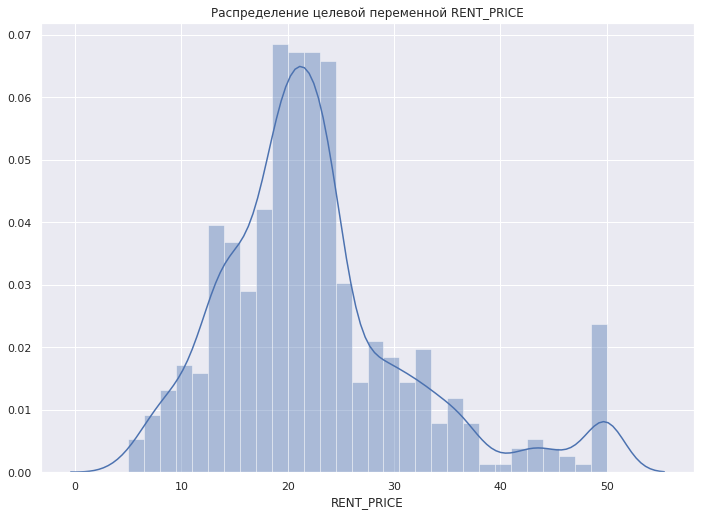

In [0]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['RENT_PRICE'], bins=30)
plt.title('Распределение целевой переменной RENT_PRICE')
plt.show()

## Предварительный анализ данных (Pandas, Matplotlib, Seaborn) 

В этом разделе вам предлагается посмотреть на данные глазами, построив несколько графиков по исходным данным.

Давайте, например, исследуем, как уровень преступности коррелирует с целевой переменной - стоимость аренды жилья в районе

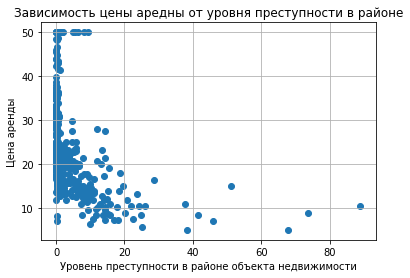

In [0]:
# модуль для построения графиков и картинок
from matplotlib import pyplot as plt

# plt.scatter(x, y) принимает на вход два вектора - X-координаты 
# и Y-координаты точек на плоскости
# можно передавать прямо столбцы датафрейма, такой формат допустим
plt.scatter(df['CRIM'], df['RENT_PRICE'])

# код для оформления графика: 
# подписываем оси, добавляем координатную сетку на график
plt.title("Зависимость цены аредны от уровня преступности в районе")
plt.xlabel("Уровень преступности в районе объекта недвижимости")
plt.ylabel("Цена аренды")
plt.grid()
plt.show()

(если картинка не построилась, то запустите ячейку еще раз)

Из графика видим, что чем выше уровень преступности на районе (чем правее по оси X), тем ниже цена аренды квартиры

### Исслезование корреляции числа комнат в квартире и цены аредны квартиры (20 баллов)

#### Построение графика (10 баллов)

Опираясь на пример кода выше, постройте такой же график для признака ```RM```(число комнат в квартире). 

Для этого передайте в функцию ```plt.scatter()``` два аргумента - ```df['RM']``` и ```df['RENT_PRICE']```

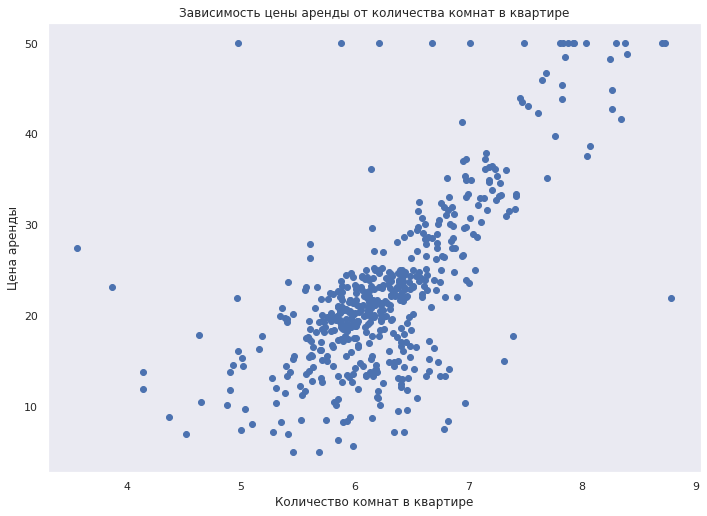

In [0]:
plt.scatter(df['RM'], df['RENT_PRICE'])
plt.title("Зависимость цены аренды от количества комнат в квартире")
plt.xlabel("Количество комнат в квартире")
plt.ylabel("Цена аренды")
plt.grid()
plt.show()

In [0]:
# plt.scatter(колонка с признаком, колонка с целевой переменной)

# plt.title("Ваше название графика")
# plt.xlabel("Ваше название оси Х")
# plt.ylabel("Ваше название оси Y")
# plt.grid()
# plt.show()

#### Опишите график (10 баллов)

Есть ли корреляция (визуальный возрастающий или убывающий тренд) между ценой аренды и числом комнат в квартире?

*ожидается ответ примерно в том же стиле, как под графиком выше с уровнем преступности*

График показывает прямую корреляцию.Цена аренды растет по мере увеличения количества комнат в квартире.

### Исследование корреляции доли бедного населения в районе и цены аредны квартиры (20 баллов)

#### Построение графика (10 баллов)

Опираясь на пример кода выше, постройте такой же график для признака ```LSTAT```(число комнат в квартире). 

Для этого передайте в функцию ```plt.scatter()``` два аргумента - ```df['LSTAT']``` и ```df['RENT_PRICE']```

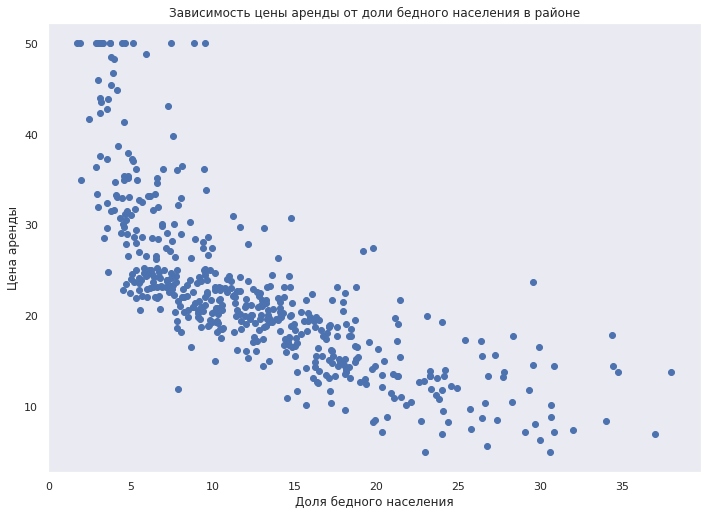

In [0]:
plt.scatter(df['LSTAT'], df['RENT_PRICE'])

# код для оформления графика: 
# подписываем оси, добавляем координатную сетку на график
plt.title("Зависимость цены аренды от доли бедного населения в районе")
plt.xlabel("Доля бедного населения")
plt.ylabel("Цена аренды")
plt.grid()
plt.show()

In [0]:
# plt.scatter(колонка с признаком, колонка с целевой переменной)

# plt.title("Ваше название графика")
# plt.xlabel("Ваше название оси Х")
# plt.ylabel("Ваше название оси Y")
# plt.grid()
# plt.show()

#### Опишите график (10 баллов)

Есть ли корреляция (визуальный возрастающий или убывающий тренд) между ценой аренды и долей бедного населения в районе?

*ожидается ответ примерно в том же стиле, как под графиком выше с уровнем преступности*

График показывает обратную корреляцию. Стоимость аренды падает по мере роста доли бедного населения в районе.

#### Оставшиеся 10 баллов вы можете получить за дополнительное исследование данных:
- поиск корреляций целевой переменной с другими признаками
- построение красивых графиков/гистограмм с помощью модуля Seaborn или Matplotlib - позвольте разгуляться вашей фантазии, используйте ноутбуки-справочники с примерами применения библиотек

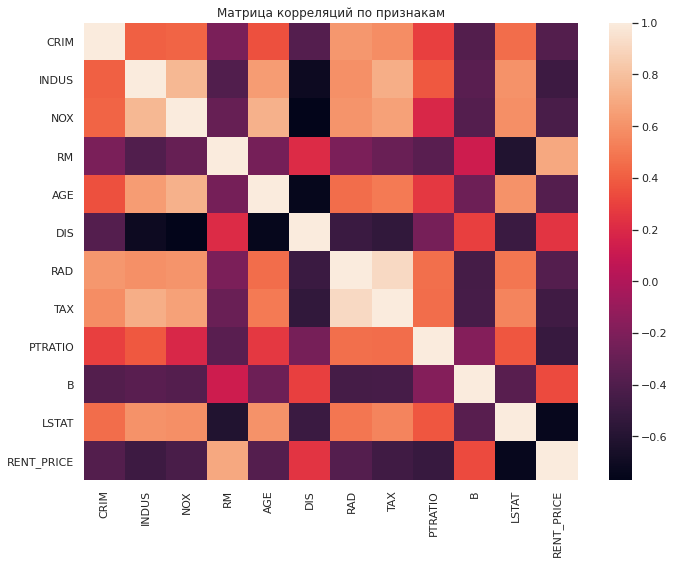

In [0]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

corrmat = df.corr()
fig, ax=plt.subplots(figsize=(10,8))
sns.heatmap(corrmat, square=False)
plt.title('Матрица корреляций по признакам')
fig.tight_layout()

Матрица показывает корреляции между парами признаков. Прямая корреляция целевой переменной с признаками RM и DIS.Обратная корреляция с признаками LSTAT, CRIM INDUS.

Проверка массива на наличие разных типов признаков и пробелов

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1   INDUS       506 non-null    float64
 2   NOX         506 non-null    float64
 3   RM          506 non-null    float64
 4   AGE         506 non-null    float64
 5   DIS         506 non-null    float64
 6   RAD         506 non-null    float64
 7   TAX         506 non-null    float64
 8   PTRATIO     506 non-null    float64
 9   B           506 non-null    float64
 10  LSTAT       506 non-null    float64
 11  RENT_PRICE  506 non-null    float64
dtypes: float64(12)
memory usage: 47.6 KB


## Часть с машинным обучением (50 баллов)

В этом разделе вам предлагается повторить тот пайплайн подготовки данных и обучения модели, который мы делали на занятии во время очного курса. Вы можете смело использовать ваш код, который вы написали во время занятий - там есть все  то, что вам нужно для выполнения этого задания

1) подготовка данных - **10 баллов** 

2) обучение модели - **5 баллов**

3) подсчет метрик по кросс-валидации - **10 баллов**

4) *(бонус)* построение графика важностей признаков, посчитанных моделью - **10 баллов**

Выполнение пунктов 2-4 для другой регрессионной модели - **до 25 баллов**

Дополнительные вопросы по теории - **по 5 баллов за каждый** 

Баллы за задания выданы с излишком. Поэтому максимальный балл (50) за эту часть можно набрать разными способам - выберите те задания, которые вам наиболее интересны, и сделайте их 

#### Подготовка данных - выделение целевой переменной и разбиение на train и  test (10 баллов)

1) Выделите столбец с целевой переменной в отдельный вектор

In [8]:
TARGET = 'RENT_PRICE'

X_let = df.drop(labels=[TARGET], axis=1, inplace=False)
y_let = df[TARGET]
print(X_let.shape, y_let.shape)

(506, 11) (506,)


In [14]:
# target = # YOUR CODE
target = df[TARGET].values
df.drop(labels=[TARGET], axis=1, inplace=True)
X = df.values

assert len(target) == 506

Примечание: команда ```assert``` в коде проверяет истинность выполнения условия.

Вам в код добавлены такие команды, чтобы вы могли понимать, правильно ли вы сделали задание. Если вы выполнили ячейку с кодом и не возникло ошибки, то скорее всего у вас все правильно

2) Удалите столбец с целевой переменной ```RENT_PRICE``` из датафрейма (метод ```.drop()``` у датафрейма).

Не забудьте либо поставить флаг ```inplace=True``` в методе ```drop()```,  чтобы колонка удалялась из самого датафрейма, а не из его копии. Либо выполните переприсваивание датафрейма ```df = df.drop(...)```. 

Также в методе ```drop()``` не забудьте указать параметр ```axis=1```, указав, что вы хотите удалить столбец, а не строчку.

Нужно сделать **что-то одно**, но не два действия вместе.

In [0]:
# YOUR CODE HERE

In [15]:
df.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
assert len(df.columns) == 11
# если здесь возникла ошибка, то вы не сохранили результат удаления колонки
# и колонка с целевой переменной по прежнему осталась в датафрейме.
# перечитайте указания про удаление колонки выше и исправьте 
# код так, чтобы колонка удалилась

**Примечание**

У вас может возникнуть ошибка, если вы попытаетесь второй раз удалить колонку, которую вы уже удалили. Если к вас возникла такая ошибка, то не пугайтесь - вы скорее всего уже удалили нужную колонку, и вам не нужно удалять ее снова. 

**Примечание**

Если вы удалили колонку с целевой переменной, но забыли ее сохранить, то просто загрузите файл с данными заново (вверху этого ноутбука) и сохраните колонку с целевой переменной до удаления

Теперь мы разделили признаки и целевую переменную - в датафрейме находятся только признаки, а в переменной ```target``` находится вектор с целевой переменной.

Их длина одинакова, каждой строке в датафрейме соответствует цена в векторе с целевой переменной

Для обучения алгоритма машинного обучения и оценки его качества необходимо  разбить данные на две части - на одной будем обучать алгоритм, а на другой (которую алгоритм не видел при обучении) будем измерять качество алгоритма

**Разбейте данные на train и test** используя функцию ```train_test_split```

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, target)

#### Обучение модели - 5 баллов

Предлагаем вам обучить ```RandomForestRegressor``` (слуйчаный лес для задачи регрессии)

Создайте объект ```RandomForestRegressor()``` и сохраните его в переменную ```model```

In [35]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

Вызовите обучение модели - метод ```model.fit()```, передав в метод обучающие данные - ```X_train``` и ```y_train```

In [49]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Если у вас после выполнения ячейки выше появился текст с параметарми ```RandomForestRegressor```, то обучение прошло успешно

Получите предсказания модели на тестовых данных (```X_test```)

In [50]:
y_pred = model.predict(X_test)

#### Подсчет метрик по кросс-валидации - **10 баллов**


In [26]:
import sklearn
from sklearn.model_selection import cross_val_score

Вычислите качество модели по кросс валидации на 5 фолдах с метрикой $R^2$

Для этого вызовите функцию ```cross_val_score```, передав туда имя обученной модели (```model```), всю таблицу с признаками (```df```), вектор с целевой переменной (```target```), число фолдов выставляется параметром ```cv=5```, скоринговую функцию передайте параметром ```scoring="r2"```

In [36]:
# чем ближе метрика R^2 к 1, тем лучше качество алгоритма
score = cross_val_score(model, X, target, scoring='r2', cv=5)

In [37]:
score

array([0.76283116, 0.85269523, 0.73054434, 0.46599274, 0.29501216])

In [39]:
score.mean()

0.6214151283415839

**Дополнительное задание (до 25 баллов)**

Вы можете взять любую другую модель для регрессии, например одну из трех предложенных

- ```linear_model.LinearRegression```
- ```linear_model.Lasso```
- ```linear_model.Ridge```

и проделать весь пайплайн обучения модели с выбранным алгоритмом. Сравните полученные метрики с ```RandomForestRegressor```. Какой алгоритм показывает более высокое качество?

In [40]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [46]:
for clf in [LinearRegression(), Lasso(), Ridge()]:
    sc = cross_val_score(clf, X, target, scoring='r2', cv=5).mean()
    print("{}. Score = {}".format(clf.__class__.__name__, sc))

LinearRegression. Score = 0.31930805887175784
Lasso. Score = 0.41221695960008675
Ridge. Score = 0.3557571172668142


Все алгоритмы показали очень низкий результат по сравнению с регрессором на базе случайного леса

#### Бонус: построение важности признаков, вычисленных моделью, и их интерпретация (10 баллов)

За вас уже написана функция, которая отрисовывает важности признаков, оцененные с помощью обученной модели. 

In [54]:
def plot_feature_importances(model, df):
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(df.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    for i in indices:
        print("{}: {:.3}%".format(df.columns[i], importances[i] * 100))
    plt.xticks(range(len(df.columns)), df.columns[indices[:len(df.columns)]], rotation=45, ha='right')
    plt.xlim([-1, (len(df.columns))])
    plt.show()

Передайте в функцию ```plot_feature_importances``` обученную модель и датафрейм с признаками (```df```), посмотрите на получившиеся топ-3 самых важных признака и скажите, по каким 3 признакам можно лучше всего оценить стоимость аредны квартиры в Бостоне?

RM: 41.6%
LSTAT: 38.2%
DIS: 6.8%
CRIM: 4.23%
NOX: 2.06%
PTRATIO: 1.79%
TAX: 1.51%
AGE: 1.35%
B: 1.12%
INDUS: 0.91%
RAD: 0.491%


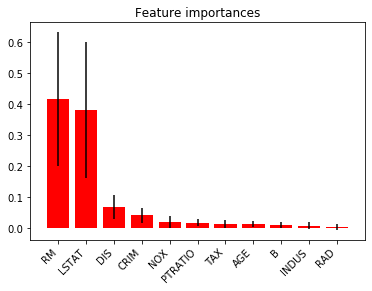

In [55]:
from matplotlib import pyplot as plt
plot_feature_importances(model, df)

Какие 3 самых важных признака по мнению модели? Проинтерпретируйте в свободной форме, почему эти признаки важны

Два самых важных признака, которые используются почти в 80% предикатах деревьев - среднее количество комнат и доля бедных людей в районе оцениваемой недвижемости. Это логично, так как понятно, что количество комнат напрямую влияет на цену, а в бедных районах редко встречаются большие цены на проживание.

Следующий по важности признак, сильно отстающий от предыдущих, - взвешенное расстояние до Бостонских центров занятости. Скорее всего, это важно для определенного класса людей, например, иммигрантов, которым необходимо по приезду найти работу.

Теоретические вопросы (5 баллов за каждый)

- Почему метрики качества алгоритма на обучающих данных выше, чем на тестовых данных?
- Зачем нужно делать кросс-валидацию для оценки качества модели?
- Правильна ли будет оценка качества модели, если обучить модель на всех имеющихся данных и на всех же данных посчитать затем метрики качества? Достаточно будет сказать, завышенны или заниженны будут метрики качества и объяснить почему

- Потому что на обучающих данных алгоритм может переобучиться, а также в тестовой выборке могут быть примеры, котоые не имеют ничего общего с примерами из обучающей
- Это нужно для того, чтобы оценить наш алгоритм наиболее объективно. То есть обучить на одном множестве, а проверить качество на другом, не имеющем с первым пересечений. И если в среднем мы имеем довольно неплохой результат - то можно сказать, что алгоритм работает хорошо
- Нет, так как на обучающей выборке алгоритм может сильно переобучиться и просто "запомнить" ответы и давать хороший результат, а на новых данных качество работы, скорее всего, очень сильно упадёт.